# Table of Contents
- [1. Introduction](#1.-Introduction)
- [2. Data Preparation](#2.-Data-Preparation)
- [3. Exploratory Data Analysis](#3.-Data-Cleaning-and-Manipulation)
- [4. Feature Engineering](#4.-Feature-Engineering)
- [5. Exploratory Data Analysis](#5.-Exploratory-Data-Analysis)
- [6. Machine Learning Modelling](#6.-Machine-Learning-Modelling)
- [7. Visualising our Results](#7.-Visualising-Our-Results)
- [8. Conclusion](#8.-Conclusion)
- [9. Work Cited](#9.-Work-Cited)


In [92]:
from util1 import count_words_in_markdown

result = count_words_in_markdown('Programming_Project_version2.ipynb')
print(f'Total number of words in markdown is {result}')

Total number of words in markdown is 1998


# 1: Introduction

The rapid growth of ride-hailing services has intensified competition in the transportation industry, highlighting the importance of customer satisfaction by ensuring reliable, high-quality service. Therefore it is essential for companies to maintain a stable, motivated driver workforce as high turnover rates can lead to inconsistent service and reduced availability, negatively affecting customer experience. Companies that fail to meet these customer expectations risk losing a substantial share of the market to competitors, thereby missing out on critical revenue opportunities.  
 

This report will analyze the factors that influence tipping behavior, providing insights that can be used to incentivize drivers. By predicting tip amounts, rideshare companies can design incentive programs to match customers with high probability of tipping to loyal drivers, allowing them to earn more, enhancing job satisfaction, and ultimately improve the quality of service. Understanding these patterns can help companies balance customer satisfaction, operational efficiency, and driver motivation, all of which are essential for long-term success in the transportation industry. 


# 2: Data Preparation

The first step of this project is data preparation. This section contains both the loading of libaries and our dataset, as well as some basic data exploration on the untouched dataset.


## 2.1 Dataset description 

The dataset we used for this project is The NYC Taxi Fare Dataset (Singh, 2024), which is a comprehensive collection of taxi trip records from New York City, capturing detailed information about individual taxi rides (ride information, financial details, and passenger and tip characteristics) across the city's five boroughs. It is obtained from New York City Taxi and Limousine Commission (TLC) and covers a period from 12/04/2019 to 04/14/2020, mandatory reporting by licensed taxi drivers and taxi companies.

 

In [80]:

#Importing packages and setup
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### 2.2 Data Loading

From loading our dataset and displaying the first few rows of data, we can see that each observation is a single NYC taxi ride, with various attributes of the ride including dropoff/pickup time, trip distance, payment type, fare amount, tip amount, and more. 

In [61]:

# Loading csv file into python
df = pd.read_csv('NYCTAXI.csv')

df = pd.read_csv('NYCTAXI.csv', low_memory=False)

df.head()





/var/folders/30/6x4xwhlx65q539cppr85k0h00000gn/T/ipykernel_3234/3016119166.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYCTAXI.csv')


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1       1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2       1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3       1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4       2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0          6.0    3.0      0.5        1.47           0.0   
1           1.0          7.0    3.0      0.5        1.50           0.0   
2           1.0          6.0    3.0      0.5        1.00           0.0   
3           1.0          5.5    0.5      0.5        1.36           0.0   
4           2.0          3.5    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         11.27                   2.5  
1                    0.3         12.30                   2.5  
2                    0.3         10.80                   2.5  
3                    0.3          8.16                   0.0  
4                    0.3          4.80                   0.0

### 2.3 Data Exploration

Now that the datset has been loaded, we use dt.info() to see the datatypes and columns we are dealing with. Note that the majority of data falls into the float64 Dtype, while the variables for pickup/dropoff time, store and forward flag, and the two location indicators are in object or integer types. We may want to remove some of these variables or change them to the same data type depending on the machine learning model we use.

In [62]:
df.info() #Getting information on unedited dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


The next few code chunks show the summary statistics, size and missing values in our dataset. The dataset has 6,405,008 observations across 18 features which is large enough to help increase accuracy of the machine learning tasks later on. The missing values code shows that the variables VendorID, passenger_count, RateCodeID, store_and_fwd_flag, and payment_type have missing values that make up roughly 1% of total data in their respective columns. During data cleaning and manipulation, these variables will be dropped if they do not fit into the analysis or address the missing values with data wrangling.

In [63]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  6.339567e+06     6.339567e+06   6.405008e+06  6.339567e+06   
mean   1.669624e+00     1.515333e+00   2.929644e+00  1.059908e+00   
std    4.703484e-01     1.151594e+00   8.315911e+01  8.118432e-01   
min    1.000000e+00     0.000000e+00  -3.062000e+01  1.000000e+00   
25%    1.000000e+00     1.000000e+00   9.600000e-01  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.600000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   2.930000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   2.102401e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  6.405008e+06  6.405008e+06  6.339567e+06  6.405008e+06  6.405008e+06   
mean   1.647323e+02  1.626627e+02  1.270298e+00  1.269411e+01  1.115456e+00   
std    6.554374e+01  6.991261e+01  4.739985e-01  1.212730e+01  1.260054e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00 -1.238000e+03 -2.700000e+01   
25%    1.320000e+02  1.130000e+02  1.000000e+00  6.500000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  9.000000e+00  5.000000e-01   
75%    2.340000e+02  2.340000e+02  2.000000e+00  1.400000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  5.000000e+00  4.265000e+03  1.130100e+02   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  6.405008e+06  6.405008e+06  6.405008e+06           6.405008e+06   
mean   4.923182e-01  2.189342e+00  3.488395e-01           2.979870e-01   
std    7.374184e-02  2.760028e+00  1.766978e+00           3.385937e-02   
min   -5.000000e-01 -9.100000e+01 -3.574000e+01          -3.000000e-01   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.950000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  2.860000e+00  0.000000e+00           3.000000e-01   
max    3.080000e+01  1.100000e+03  9.105000e+02           3.000000e-01   

       total_amount  congestion_surcharge  
count  6.405008e+06          6.405008e+06  
mean   1.866315e+01          2.275662e+00  
std    1.475736e+01          7.352646e-01  
min   -1.242300e+03         -2.500000e+00  
25%    1.116000e+01          2.500000e+00  
50%    1.430000e+01          2.500000e+00  
75%    1.980000e+01          2.500000e+00  
max    4.268300e+03          2.750000e+00

In [64]:
print("Size of the DataFrame (number of elements):", df.size)
print("Shape of the DataFrame (rows, columns):", df.shape)


Size of the DataFrame (number of elements): 115290144
Shape of the DataFrame (rows, columns): (6405008, 18)


In [65]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
VendorID                 1.021716
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          1.021716
trip_distance            0.000000
RatecodeID               1.021716
store_and_fwd_flag       1.021716
PULocationID             0.000000
DOLocationID             0.000000
payment_type             1.021716
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
dtype: float64


# 3: Data Cleaning and Manipulation

The following section involves dropping features, dealing with missing values, and converting features into the proper data types. 

Firstly, all observations that have missing values are dropped instead of being replaces, as the dataset is large enough to have minimal effect on overall data.

Next, the pickup and dropoff times are converted to datetime format to facilitate  Because during feature engineering a new feature for ride time is created, and changing the format makes this process more straightforward. We also change payment_type to a binary variable where 1 is credit card and 0 is cash. This is more useful than the original float datatype which used the values 1.0 and 2.0.

In [66]:
#Dropping rows
df = df.dropna() #Dropping missing values
df = df[df['payment_type'].isin([1.0, 2.0])]
# Dropping Unneeded Columns
df = df.drop(columns=['store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'RatecodeID'])

# Converting the datetime columns to pandas datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
#Changing payment type to binary variable
df['payment_type'] = df['payment_type'].replace({1.0: 1.0, 2.0: 0.0}) #1 is credit, 0 is cash
df['payment_type'] = pd.Categorical(df['payment_type'])

print(df.dtypes)


VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object


An additional check we want to do during this process is to ensure that outside of missing values, our features do not contain any values that would be impossible. For instance, fare, tolls, tip and other measures cannot be negative in our dataset. The code below filters out any rows that have negative values in the specified columns, and checks to ensure our adjusted dataset contains no impossible values.

In [67]:
#Dropping impossible values, these variables cannot be negative
columns_to_check = ['fare_amount', 'tolls_amount', 'tip_amount','extra','mta_tax','improvement_surcharge','congestion_surcharge','trip_distance']


# Filtering out rows where any of the specified columns have negative values
df = df[(df[columns_to_check] >= 0).all(axis=1)]

# Verifying that there are no negative values in the specified columns
negative_values_check = df[columns_to_check].lt(0).sum()
print(negative_values_check)

fare_amount              0
tolls_amount             0
tip_amount               0
extra                    0
mta_tax                  0
improvement_surcharge    0
congestion_surcharge     0
trip_distance            0
dtype: int64


# 4: Feature Engineering

### Creating new Features

Given that the aim of our machine learning project is to predict tipping using Randomforest and Decision Tree models, we want to engineer new features based on our existing dataset that can help our model accuracy. 

Firstly, we want to use the dropoff and pickup features to create a ride duration feature which takes the difference of these two values. This allows us to use ride duration as a feature in our supervised learning models. Through our data exploration process, we also decided it would be useful to have a peak/offpeak metric in our dataset, as this would likely have an effect on a number of variables including tip amount. We thus used the pickup feature to create peak_offpeak based on the hour the pickup time of the ride. Finally, at this step of the process we were unsure as to whether we should predict tip amount or simply whether a customer tipped or not. Therefore, we created the tip_given feature so we could decide between our two approaches. 

In [68]:
#Code partially generated with AI help of AI, see appendix for details
# Creating a 'ride_duration_minutes' column
df['ride_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Creating a 'peak_offpeak' column based on the pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['peak_offpeak'] = df['pickup_hour'].apply(lambda x: '1' if (7 <= x < 10) or (17 <= x < 19) else '0') #peak is 1, offpeak is 0

# Dropping the temporary 'pickup_hour' column
df = df.drop(columns=['pickup_hour'])

#Creating binary variable tip_given if tip was given or not

df['tip_given'] = df['tip_amount'].apply(lambda x: 1 if x > 0.00 else 0)

# Displaying first few lines of dataframe
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1       1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2       1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3       1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4       2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance payment_type  fare_amount  extra  mta_tax  tip_amount  \
0            1.2          1.0          6.0    3.0      0.5        1.47   
1            1.2          1.0          7.0    3.0      0.5        1.50   
2            0.6          1.0          6.0    3.0      0.5        1.00   
3            0.8          1.0          5.5    0.5      0.5        1.36   
4            0.0          0.0          3.5    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                    0.3         11.27                   2.5   
1           0.0                    0.3         12.30                   2.5   
2           0.0                    0.3         10.80                   2.5   
3           0.0                    0.3          8.16                   0.0   
4           0.0                    0.3          4.80                   0.0   

   ride_duration_minutes peak_offpeak  tip_given  
0               4.800000            0          1  
1               7.416667            0          1  
2               6.183333            0          1  
3               4.850000            0          1  
4               2.300000            0          0

# 5: Exploratory Data Analysis

To predict tip_amount and tip_given, a heatmap is used to help identify which variables are more strongly associated and might be important predictors. A heatmap is particularly useful as it can easily portray an overview of the data.  

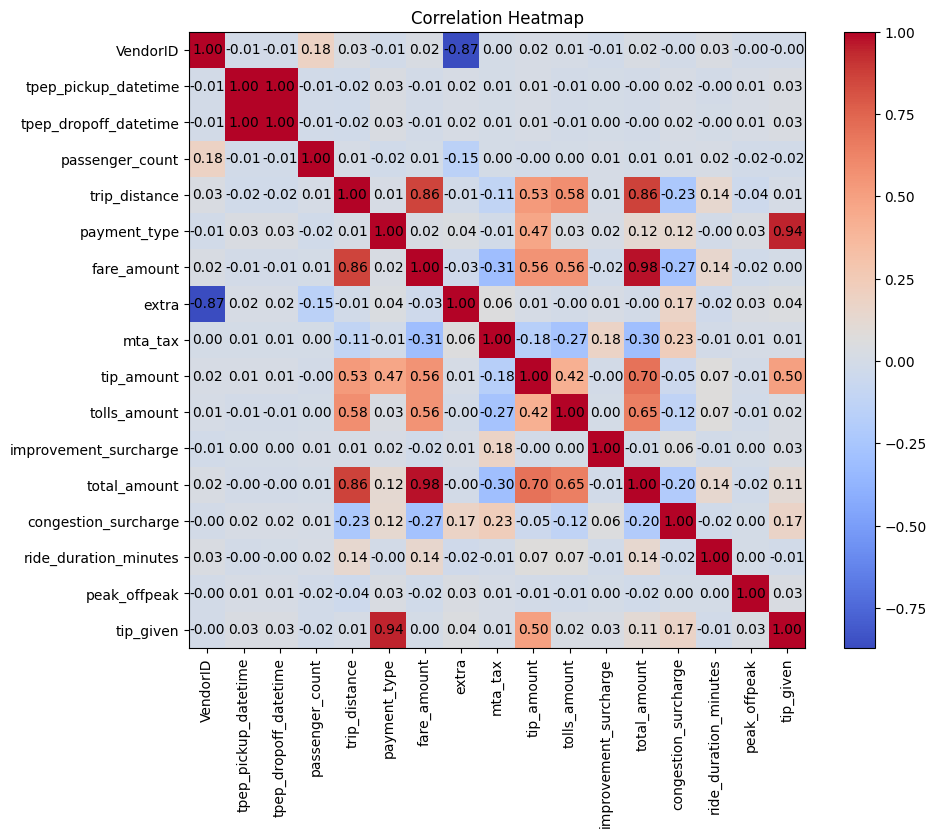

In [69]:
#Code partially created with the help of GenAI, see appendix for details

correlation_matrix = df.corr()

# Plotting the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')

#Correlation coefficient display

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')
        
plt.show();

Based on correlation matrix, we see more relationships between our explanatory variables and tip_amount compared to tip_given, suggesting it is a better variable to use for our machine learning tasks. 

According to the heatmap, tip_amount and total_amount have the strongest positive correlation(0.70), however total_amount already includes tip amount, and is only known after the trip is over. The following highest correlation is fare_amount(0.56), which has a high correlation with total_amount (0.98), indicating multicollinearity. Since tip_amount already correlates well with fare_amount, adding total_amount might not add value and could introduce noise in the model, therefore not considered for our prediction model. 

Trip_distance has a correlation of 0.53 with tip_amount, which aligns with the expectation that longer trips have higher fares, therefore higher higher tip amounts. Another significant relationship lies between tip_amount and payment_type with a positive correlation of 0.47, indicating that the way a customer pays (e.g., card vs. cash) significantly impacts the likelihood and amount of a tip. 

Finally tolls_amount also positively correlates with tip_amount (0.42), suggesting it might have an impact on tip_amount. On the other hand, mta_tax has a weak negative correlation (-0.18) with tip_amount, suggesting the higher the tax, the lower the tipping amount, however this relationship is minimal. 

## 5.1 Correlations between variables

To more directly observe each explanatory variable and its effect on tip_amout, individual scatter plots between them are conducted:

/Users/svenkoopmans/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


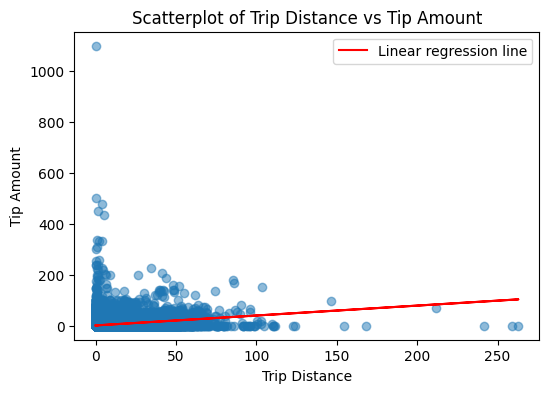

In [70]:
# Scatterplot and linear regression for 'trip_distance' vs 'tip_amount'
plt.figure(figsize=(6, 4))
plt.scatter(df['trip_distance'], df['tip_amount'], alpha=0.5)
x = df['trip_distance']
y = df['tip_amount']
coefficients = np.polyfit(x, y, 1)
linear_fit = np.poly1d(coefficients)
plt.plot(x, linear_fit(x), color='red', label='Linear regression line')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title('Scatterplot of Trip Distance vs Tip Amount')
plt.legend()
plt.show();

The first scatterplot shows the relationship between trip distance and tip amount, with a linear regression line that indicates a weak positive trend. This relationship is not strong, as most data points are clustered around shorter distances and lower tip amounts, suggesting limited predictive power for tip amount. The presence of a few outliers, such as unusually high tips for shorter distances, suggests the need for further investigation into potential anomalies or external factors influencing tipping behavior. Nonetheless, it could still contribute to tipping behaviour when combined with other variables.  

<Figure size 600x400 with 0 Axes>

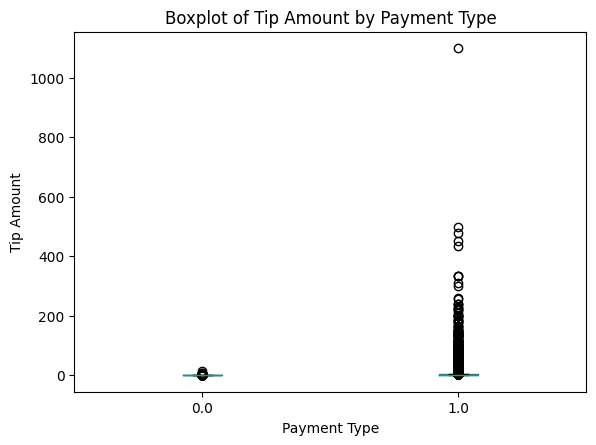

In [71]:
# Boxplot for 'payment_type' vs 'tip_amount'
plt.figure(figsize=(6, 4))
df.boxplot(column='tip_amount', by='payment_type', grid=False)
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.title('Boxplot of Tip Amount by Payment Type')
plt.suptitle('')  # Removes the automatic "by" title from Pandas
plt.show();

 
 The boxplot shows that when payment_type is card (1.0), there is significantly higher tip amounts compared to cash (0.0). This could be due to technological nudges and convenience by integrating pre-set percentage options directly into payment systems.

/Users/svenkoopmans/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


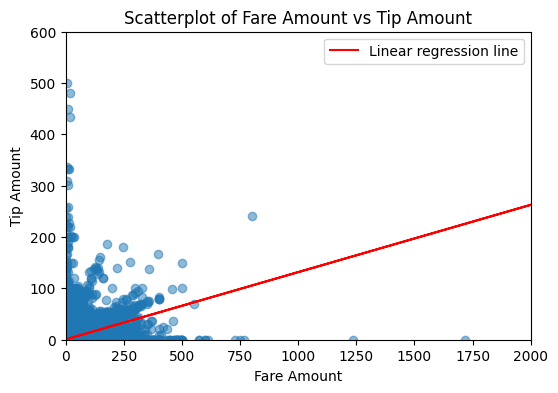

In [72]:
# Scatterplot and linear regression for 'fare_amount' vs 'tip_amount'
plt.figure(figsize=(6, 4))
plt.scatter(df['fare_amount'], df['tip_amount'], alpha=0.5)
x = df['fare_amount']
y = df['tip_amount']
coefficients = np.polyfit(x, y, 1)
linear_fit = np.poly1d(coefficients)
plt.plot(x, linear_fit(x), color='red', label='Linear regression line')
plt.xlim(0, 2000)
plt.ylim(0, 600)
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.title('Scatterplot of Fare Amount vs Tip Amount')
plt.legend()
plt.show();

The upper slope in the regression line between fare amount and tip amount, indicates a positive trend. The data points are heavily concentrated at lower fare and tip amounts,and the variability in tips increases with fare amount. However, there are outliers where tips are disproportionately high or low for the fare, suggesting there are other influencial factors that affect tipping behavior. 

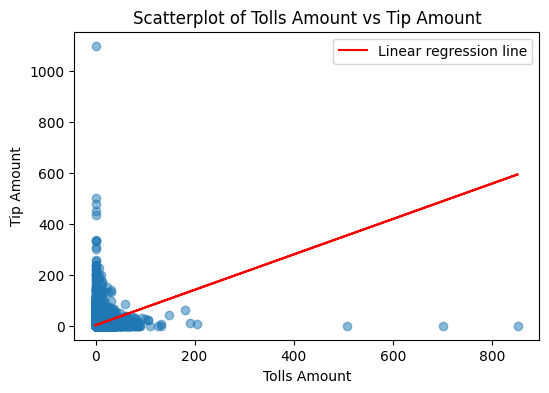

In [73]:
# Scatterplot and linear regression for 'tolls_amount' vs 'tip_amount'
plt.figure(figsize=(6, 4))
plt.scatter(df['tolls_amount'], df['tip_amount'], alpha=0.5)
x = df['tolls_amount']
y = df['tip_amount']
coefficients = np.polyfit(x, y, 1)
linear_fit = np.poly1d(coefficients)
plt.plot(x, linear_fit(x), color='red', label='Linear regression line')
plt.xlabel('Tolls Amount')
plt.ylabel('Tip Amount')
plt.title('Scatterplot of Tolls Amount vs Tip Amount')
plt.legend()
plt.show();

The scatterplot shows that as toll amount increases, the tip amount tends to increase as well, although the relationship appears to be weak and influenced by outliers. Most data points are clustered around lower toll amounts (close to $0-$50), with corresponding tip amounts also being relatively low. There are few outliers with high toll amounts and disproportionately high tips (e.g., tolls > $200 and tips > $200) which drive the regression line upwards. In summary, while tolls might contribute indirectly to tipping behavior, it is not a strong predictor.  

# 6: Machine Learning Modelling

## 6.1: Variable Selection and Refinement 
During EDA, it was observed that the total_amount variable is a summation of other variables, including tip_amount, tolls_amount, and fare_amount. Including this variable in the model would introduce multicollinearity, distorting the model's interpretability and performance. 

As a result, total_amount was excluded from the feature set for the machine learning models. The final variables selected were trip_distance, fare_amount, tolls_amount, payment_type.

The target variable for prediction was tip_amount. 

## 6.2: RandomForest

In [74]:
#Code partially created with help of GenAI, see appendix for details
#Rescale
# Selecting features and target variable
features = ['trip_distance', 'fare_amount','tolls_amount', 'payment_type']
X = df[features]
y = df['tip_amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

RandomForestRegressor(random_state=42)

Mean Squared Error: 2.759786531319684
R^2 Score: 0.6381136142710562


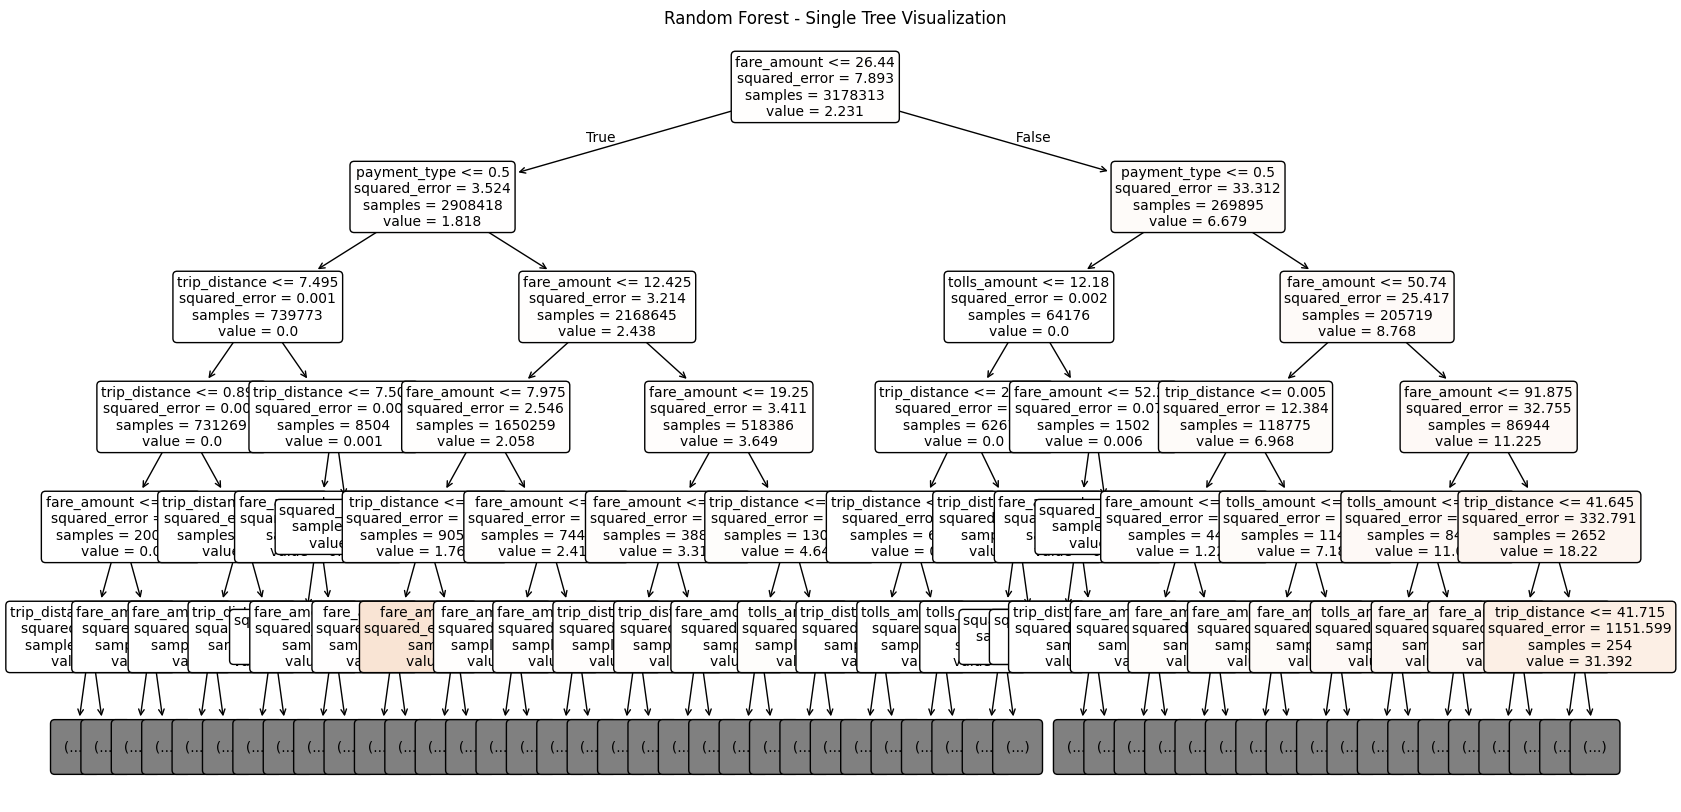

In [89]:
# Extract one tree from the Random Forest
random_forest_tree = rf_model.estimators_[0]  # Select the first tree in the forest

# Visualize the selected tree
plt.figure(figsize=(20, 10))
plot_tree(
    random_forest_tree,       
    feature_names=features,   
    filled=True,
    max_depth = 5,              
    rounded=True,             
    fontsize=10               
)
plt.title("Random Forest - Single Tree Visualization")
plt.show();

Random Forest Regressor: Achieved an R2 score of 0.63, indicating that the model explains 63% of the variance in the tip amounts. This is reasonably high predictive power, given the removal of multicollinear effects. The visual above shows the first tree of the Random Forest model, we can see at each node a decision rule is made based on our input variables which further splits the cohort.

## 6.3 Decision Trees

In [85]:
# Creating and fitting a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

DecisionTreeRegressor(random_state=42)

Mean Squared Error: 3.150055752714917
R^2 Score: 0.5869382366144247


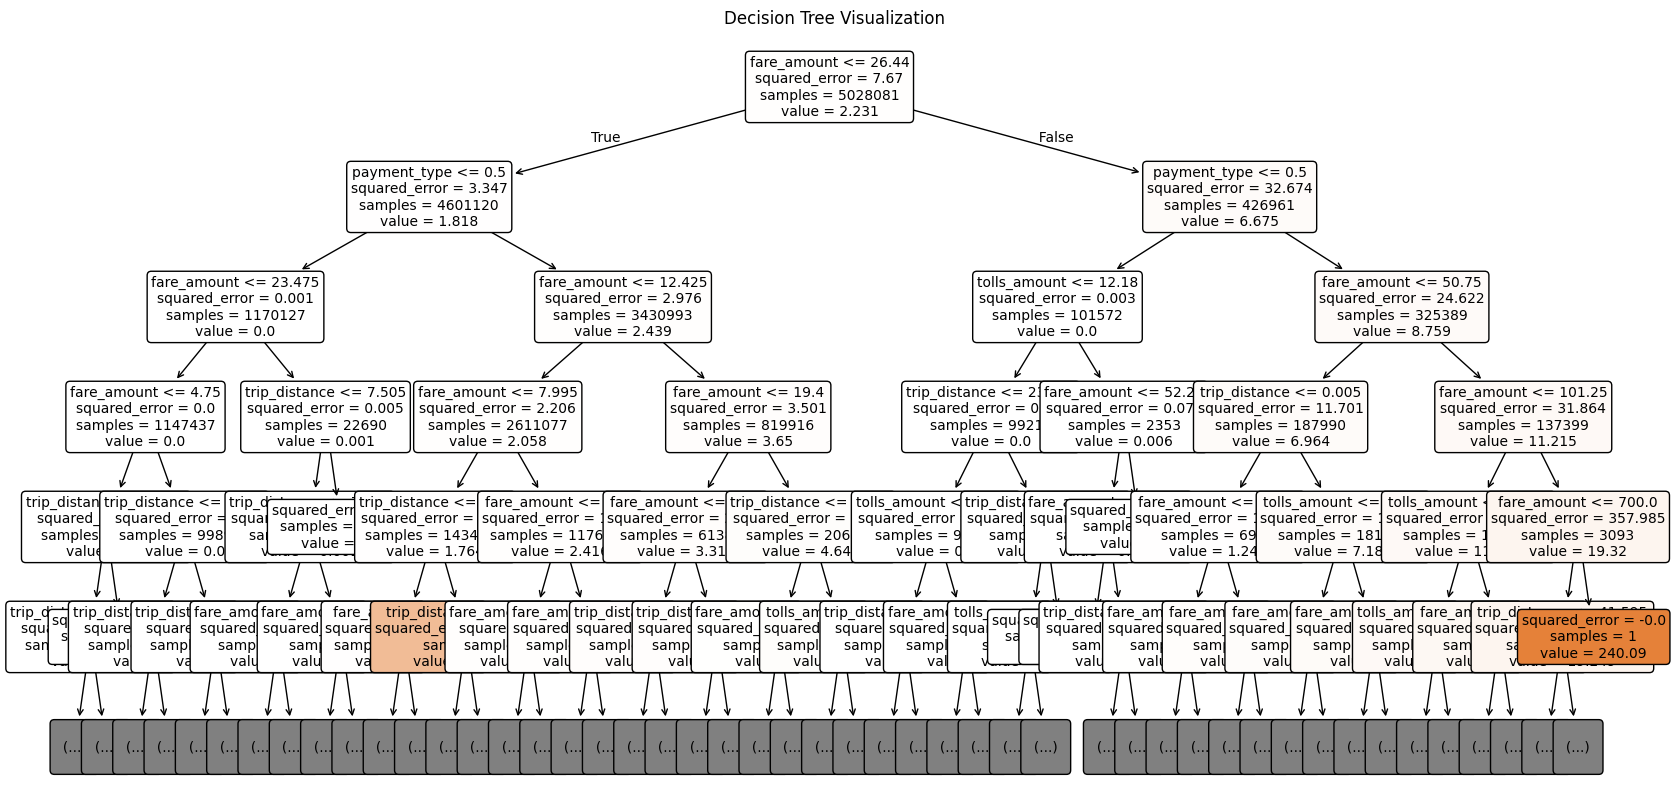

In [88]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,                 
    feature_names=features,   
    max_depth = 5,
    filled=True,              
    rounded=True,             
    fontsize=10               
)
plt.title("Decision Tree Visualization")
plt.show();

Decision Tree Regressor: Produced an R2 score of 0.58, slightly lower than the Random Forest but consistent with expectations for a single-tree model. The visual above shows the first 5 levels of the decision tree. This is more interpretable than visual provided in the RandomForest model as that was one of many trees that are averaged, while this is the only tree our model made predictions on. This reflects the tradeoff between interpretability and complexity of the two methods.

 

# 7: Visualising Our Results

In visualising our results, we used a scatter plot for each machine learning model to show the predicted values for tip-amount compared to the actual values in our dataset. We removed outliers from this plot as there is less of a predictive capacity to determine tips when they are disproportionately large. For example, individuals who tip amounts in the hundreds are often larger than the total fare and have no correlation to our other indicators.

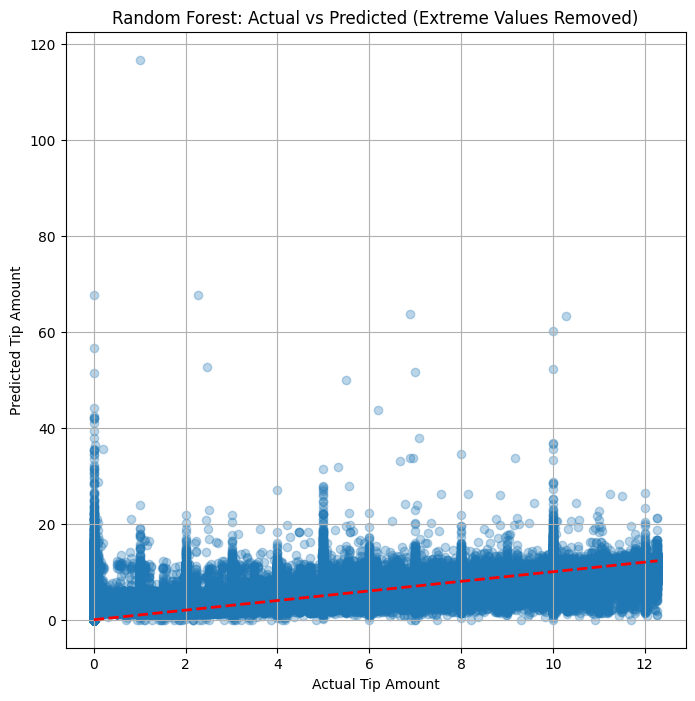

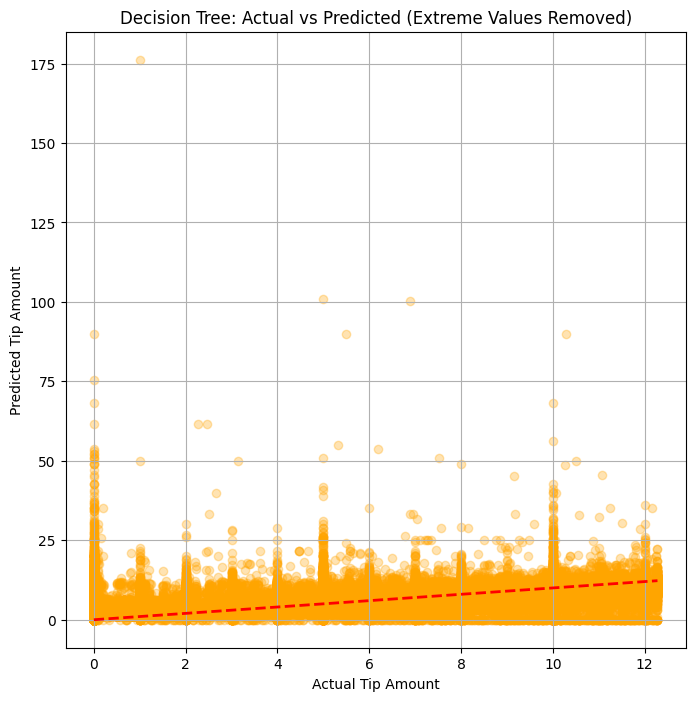

In [24]:


# Define percentile thresholds
lower_bound_rf = np.percentile(y_test, 1)  # 1st percentile
upper_bound_rf = np.percentile(y_test, 99)  # 99th percentile

# Filter y_test and predictions for Random Forest
rf_value_filter = (y_test >= lower_bound_rf) & (y_test <= upper_bound_rf)
filtered_y_test_rf = y_test[rf_value_filter]
filtered_y_pred_rf = rf_model.predict(X_test)[rf_value_filter]

plt.figure(figsize=(8, 8))
plt.scatter(filtered_y_test_rf, filtered_y_pred_rf, alpha=0.3)
plt.plot(
    [filtered_y_test_rf.min(), filtered_y_test_rf.max()],
    [filtered_y_test_rf.min(), filtered_y_test_rf.max()],
    color='red', linestyle='--', linewidth=2,
)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Random Forest: Actual vs Predicted (Extreme Values Removed)")
plt.grid()
plt.show();

# Define percentile thresholds
lower_bound_dt = np.percentile(y_test, 1)  # 1st percentile
upper_bound_dt = np.percentile(y_test, 99)  # 99th percentile

# Filter y_test and predictions for Decision Tree
dt_value_filter = (y_test >= lower_bound_dt) & (y_test <= upper_bound_dt)
filtered_y_test_dt = y_test[dt_value_filter]
filtered_y_pred_dt = dt_model.predict(X_test)[dt_value_filter]

plt.figure(figsize=(8, 8))
plt.scatter(filtered_y_test_dt, filtered_y_pred_dt, alpha=0.3, color='orange')
plt.plot(
    [filtered_y_test_dt.min(), filtered_y_test_dt.max()],
    [filtered_y_test_dt.min(), filtered_y_test_dt.max()],
    color='red', linestyle='--', linewidth=2,
)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Decision Tree: Actual vs Predicted (Extreme Values Removed)")
plt.grid()
plt.show();


# 8: Conclusion

## 8.1: Selection and Limitations

Based on our analysis, our RandomForest model performed better than the Decision Trees when comparing the R squared and MSE of both models. While in a business context an R squared of 0.63 is acceptable for this kind of prediction, we could have improved model performance if our dataset included additional information. For example, if we had data on passenger characteristics such as previous tipping behaviour for customers our model could be more accurate. Additionally, customer tipping behaviour can change over time, meaning the model needs to be consistently updated to reflect seasonal factors.

## 8.2: Business Conclusions

Using our model, rideshare companies can better estimate tip value based on ride details to match high tip customers to their most loyal drivers. This would give them an advantage against competitors with less robust driver loyalty programs. In order to implement this model, a company may want to collect additional features on rides to improve predicting power.

# 9. References:

Singh, D. (2024). NYC Taxi Fare Dataset. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/diishasiing/revenue-for-cab-drivers. 

 

# Appendix

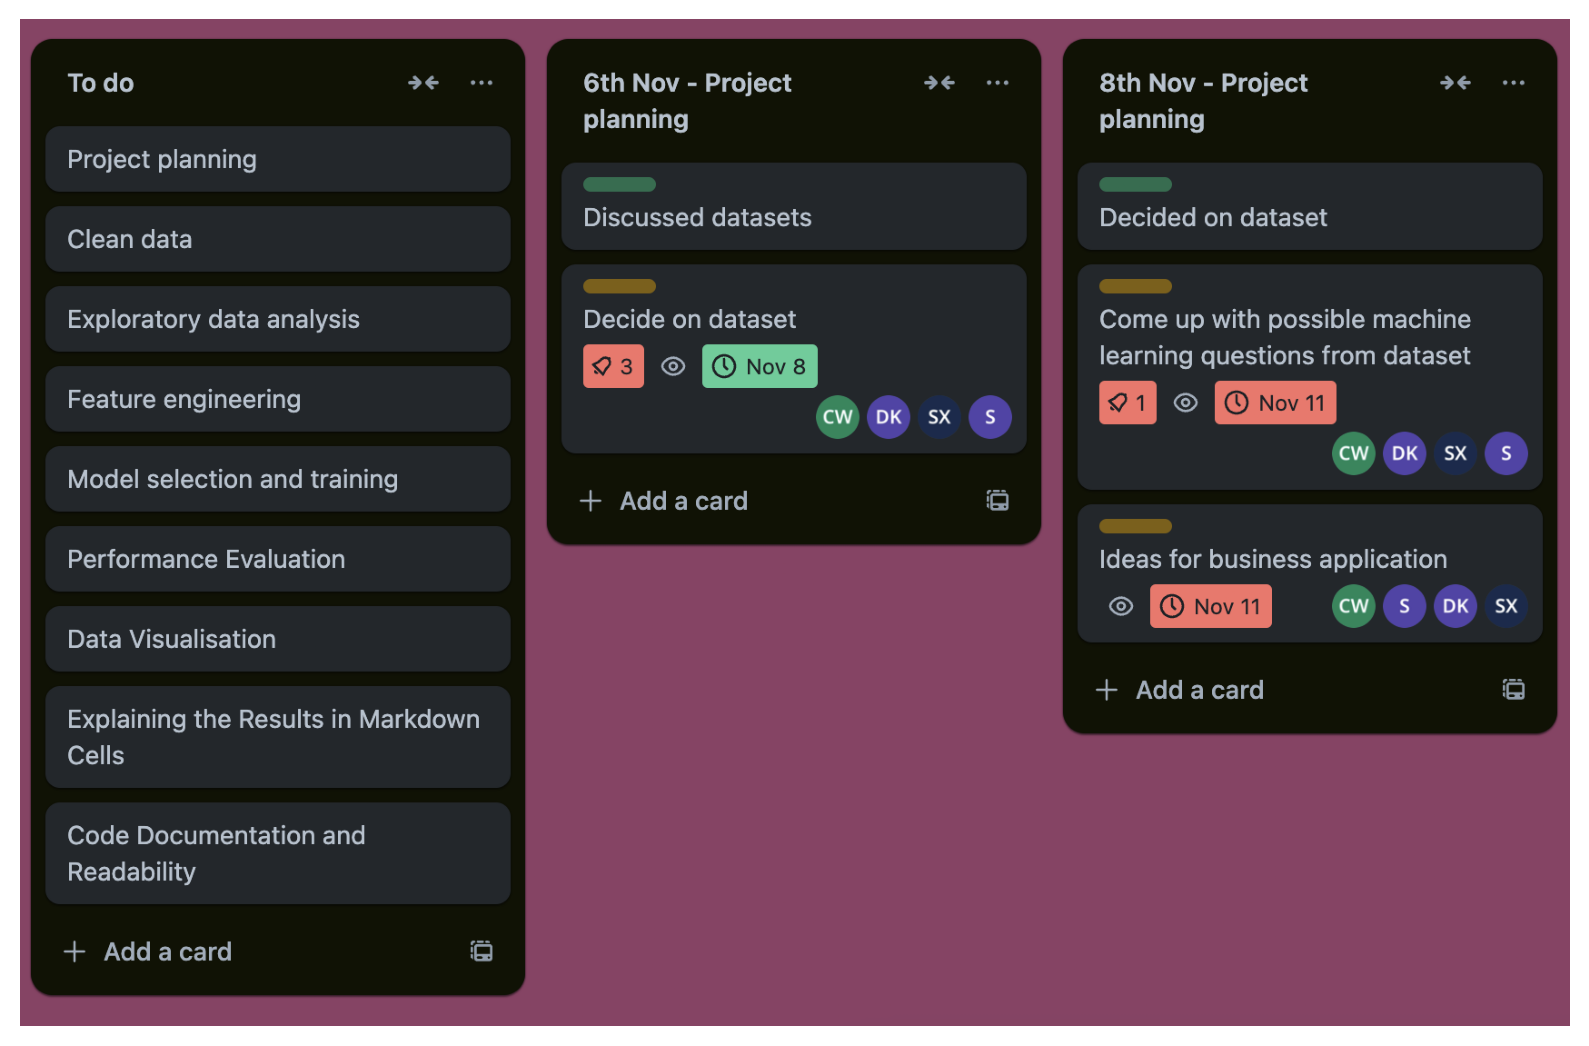

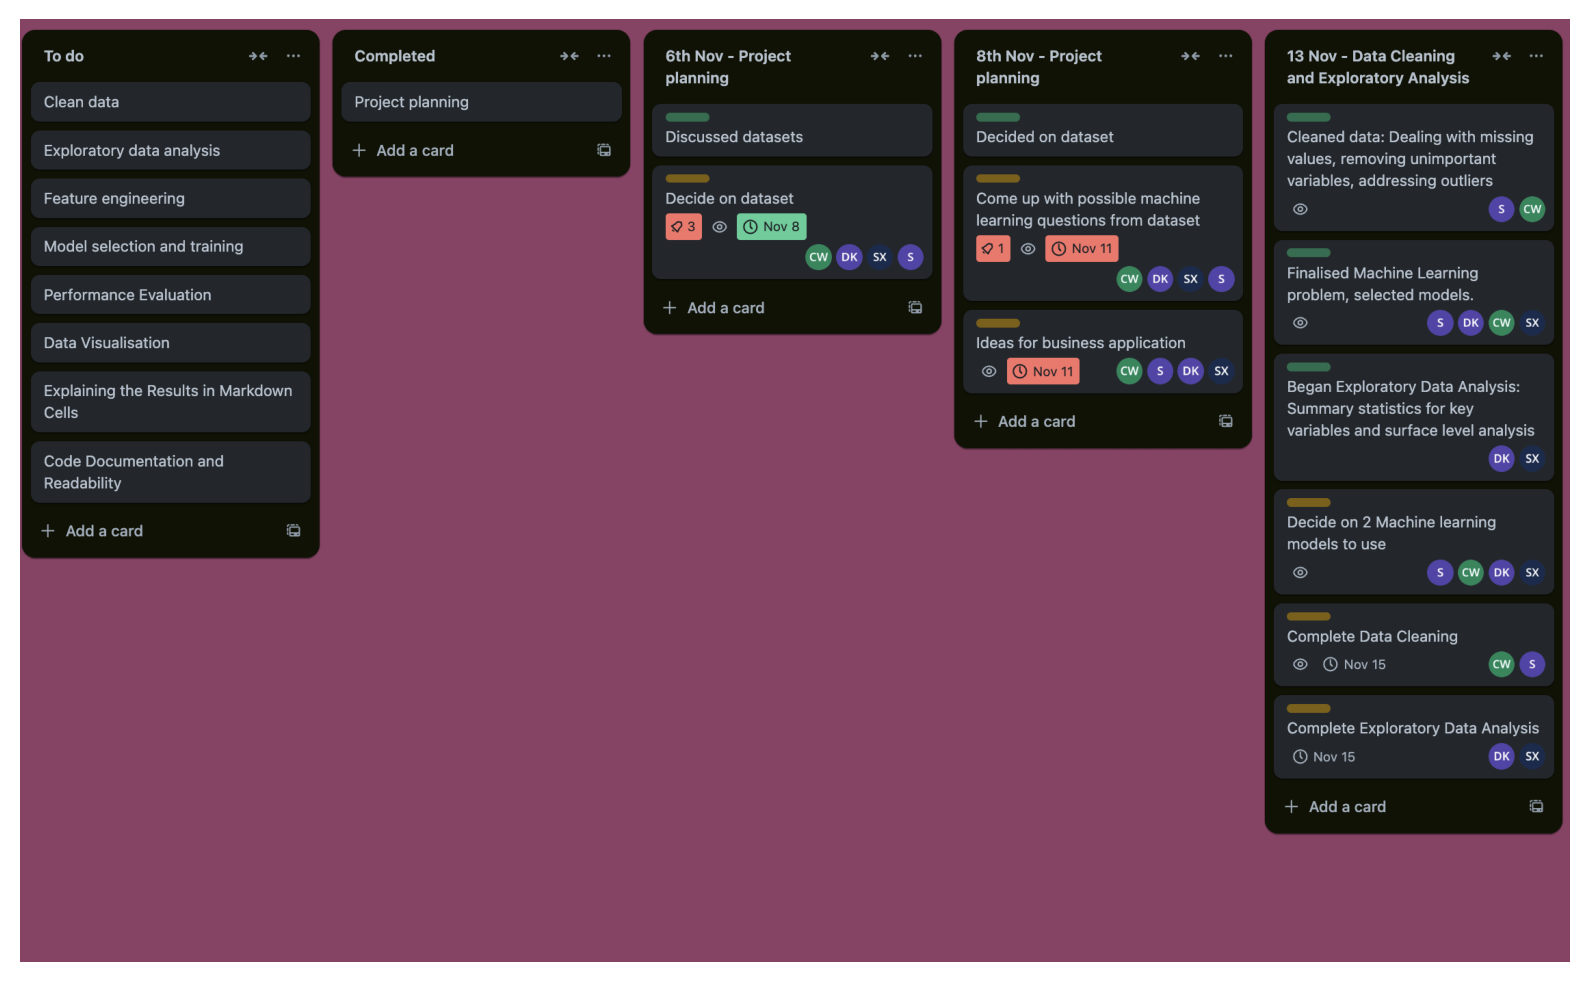

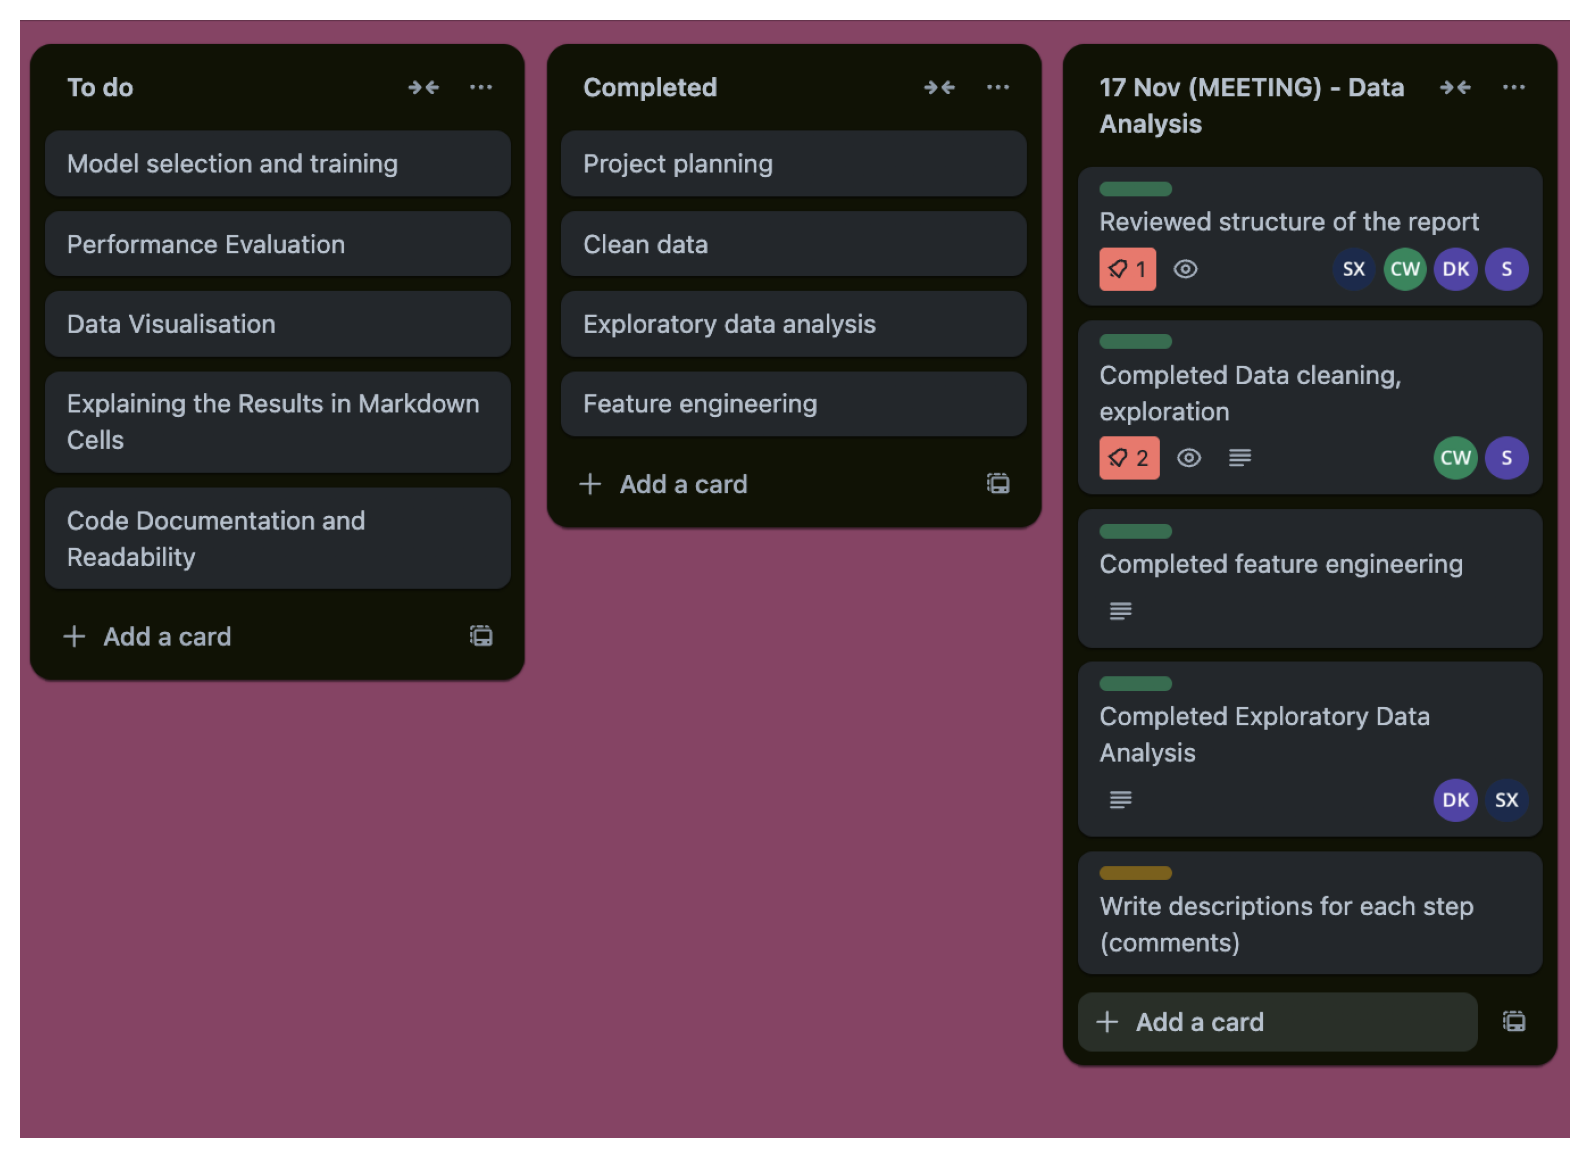

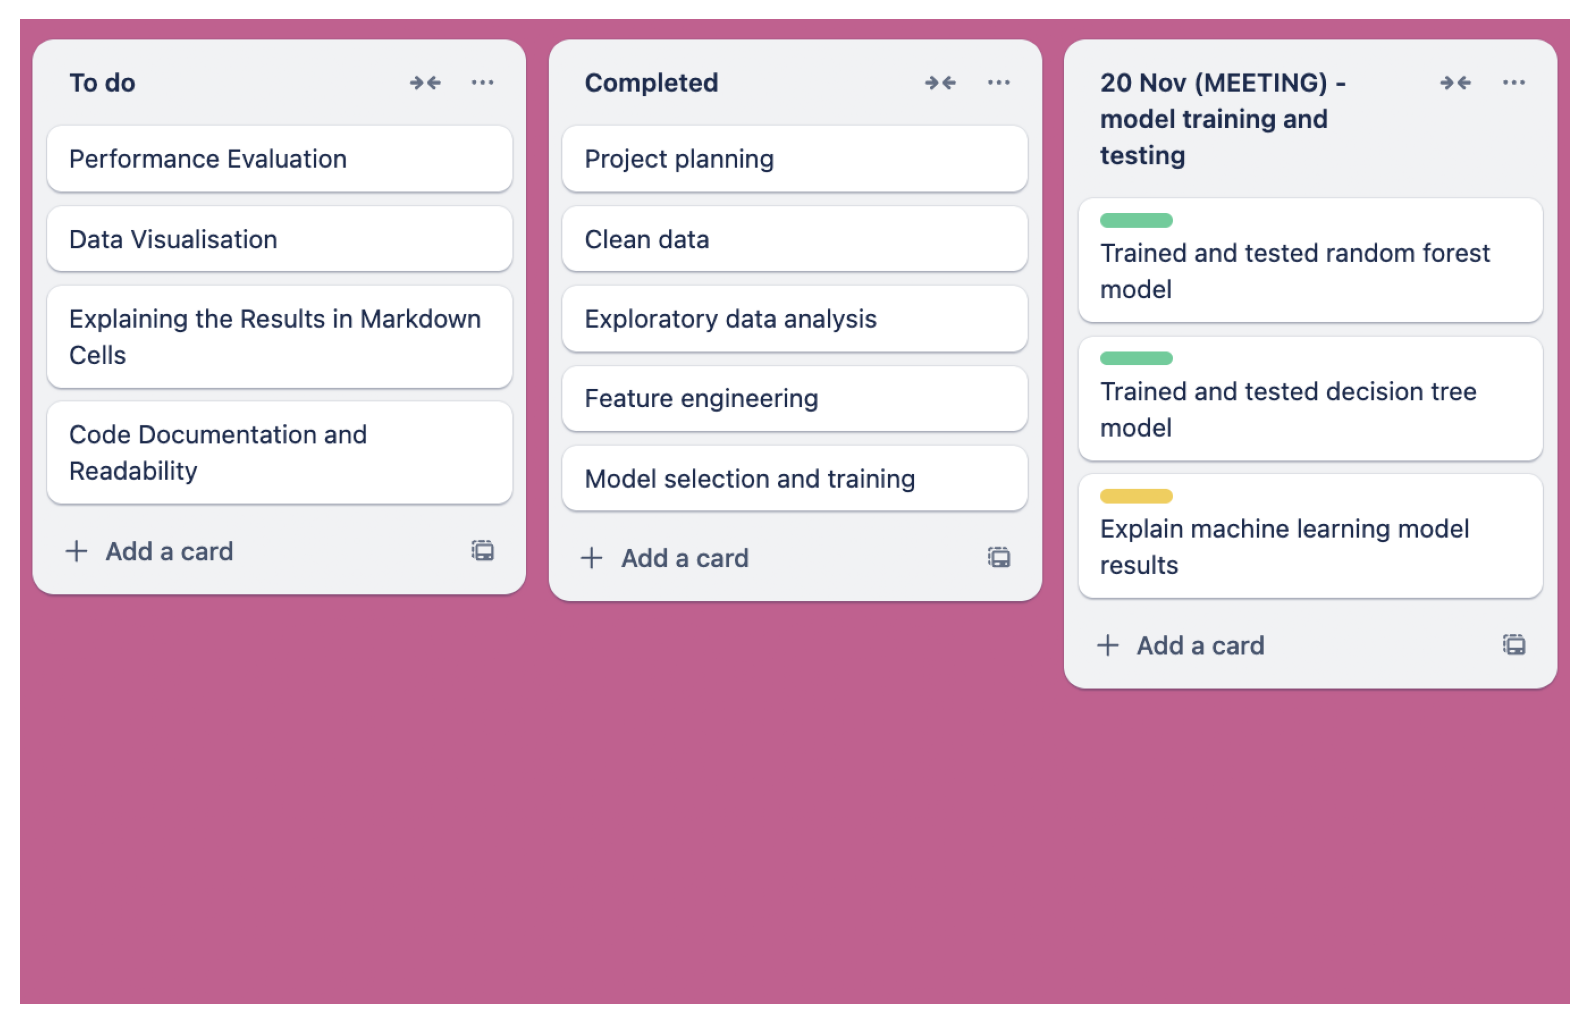

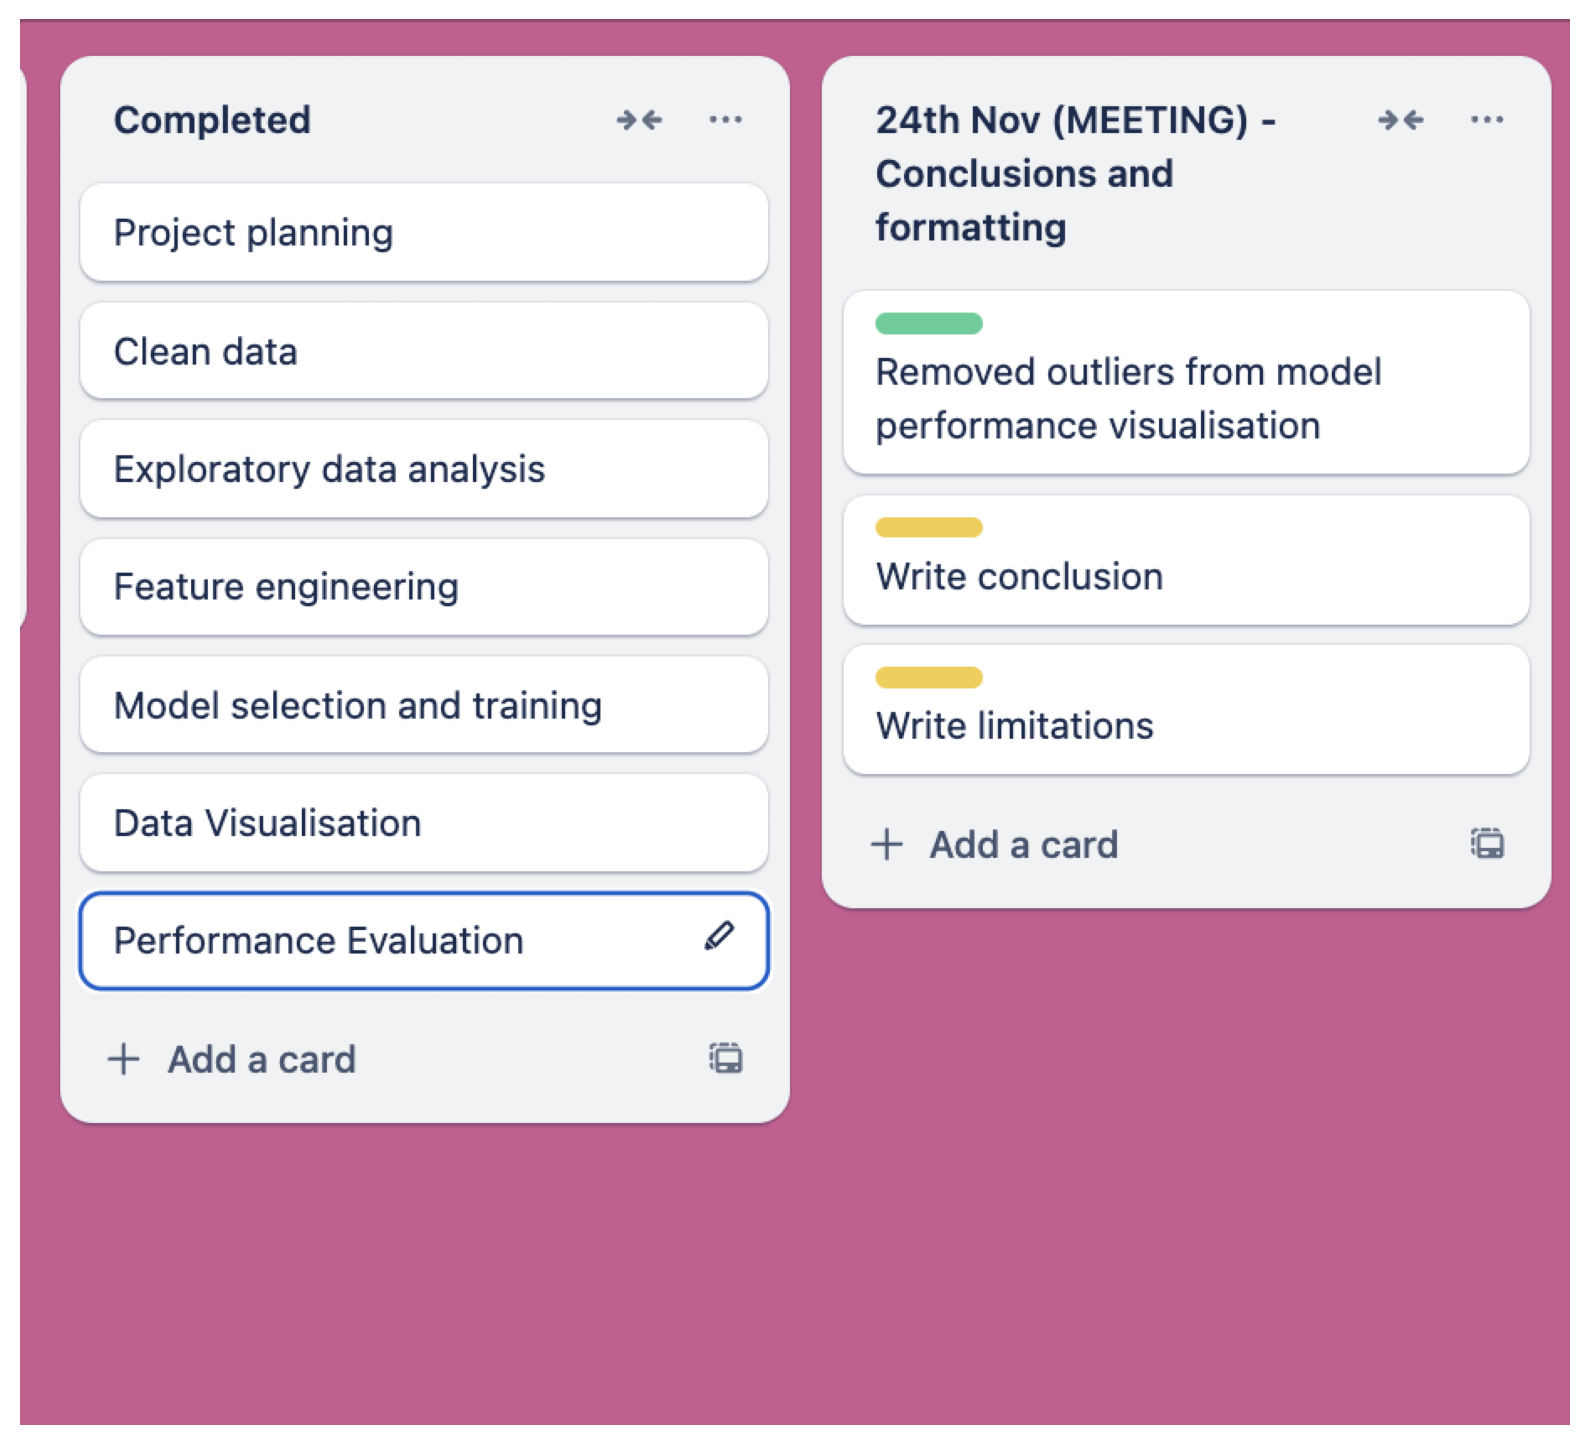

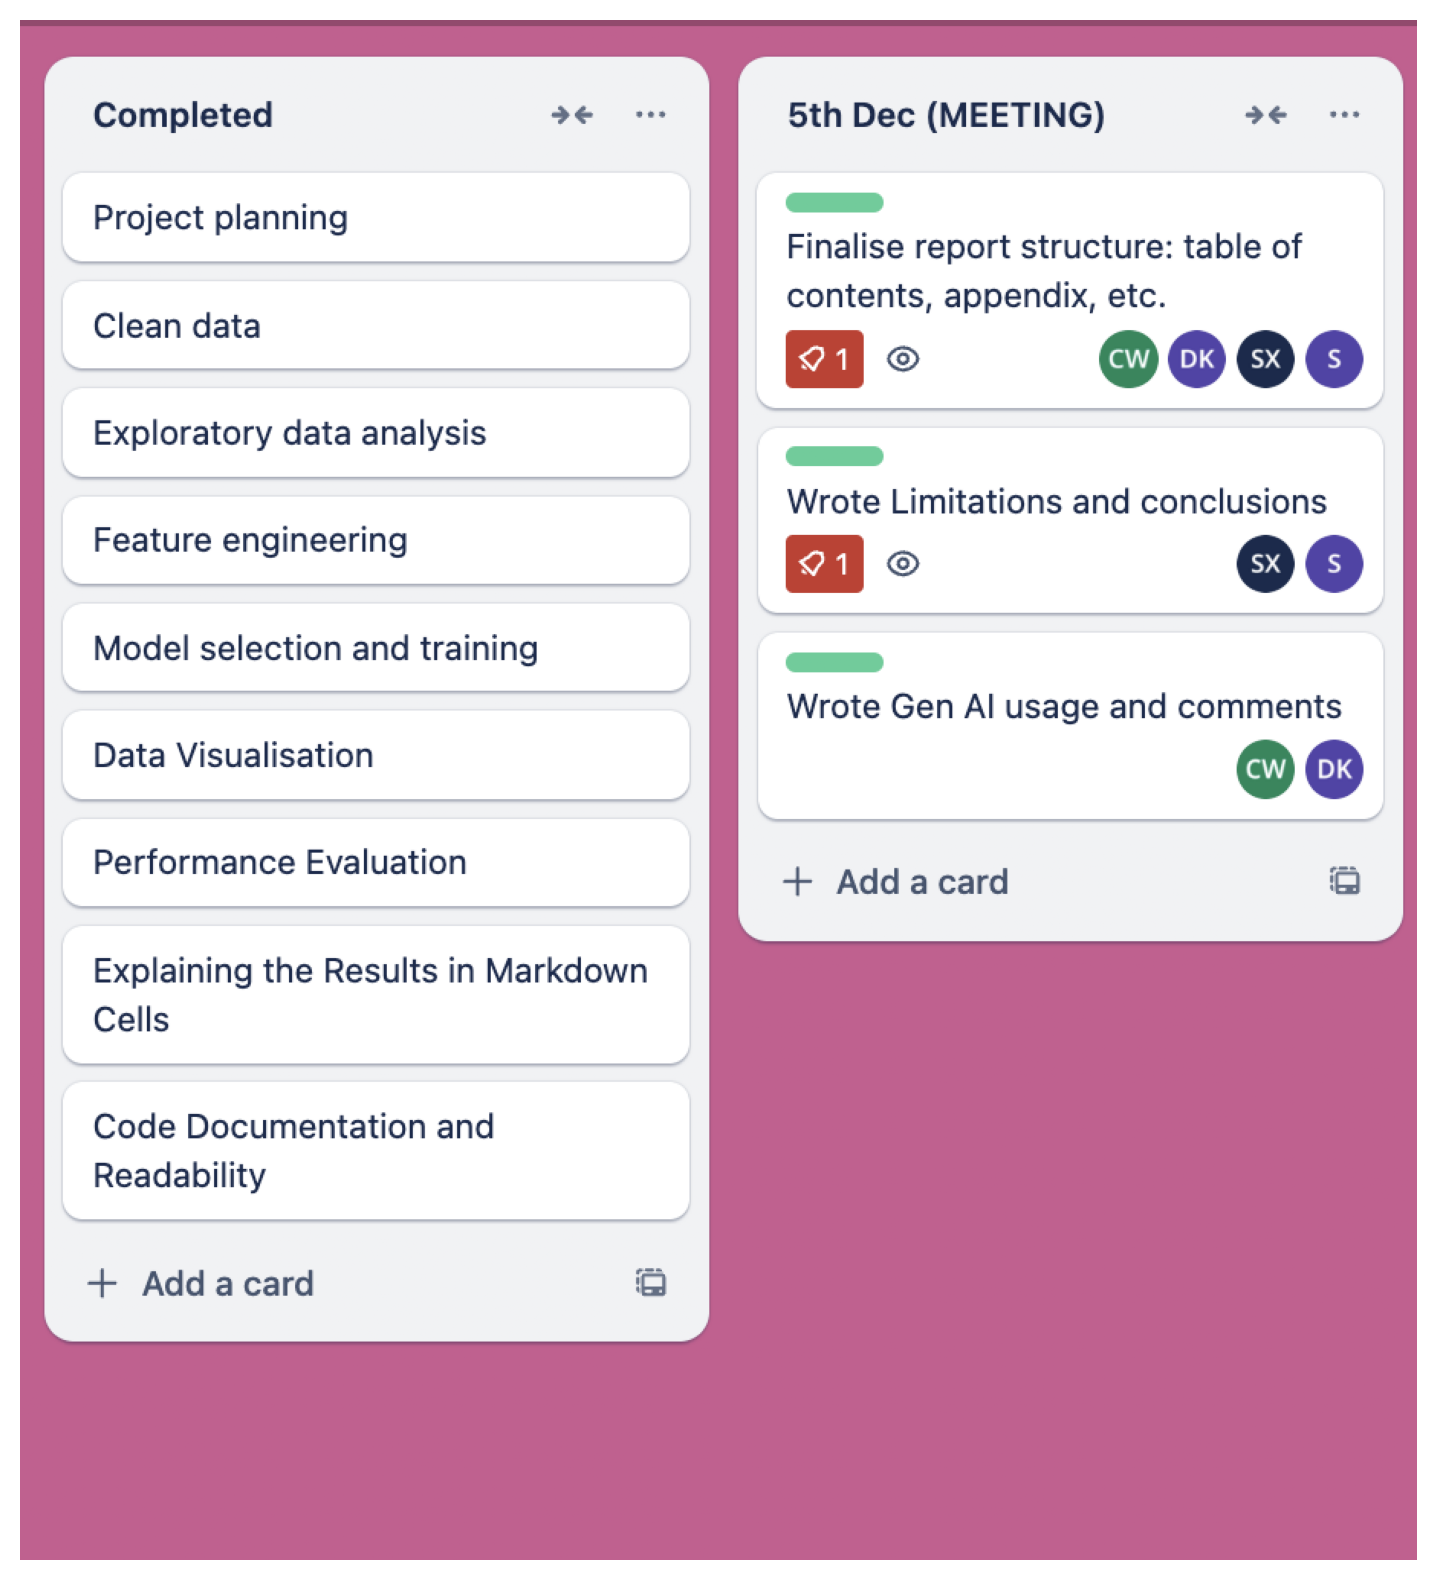

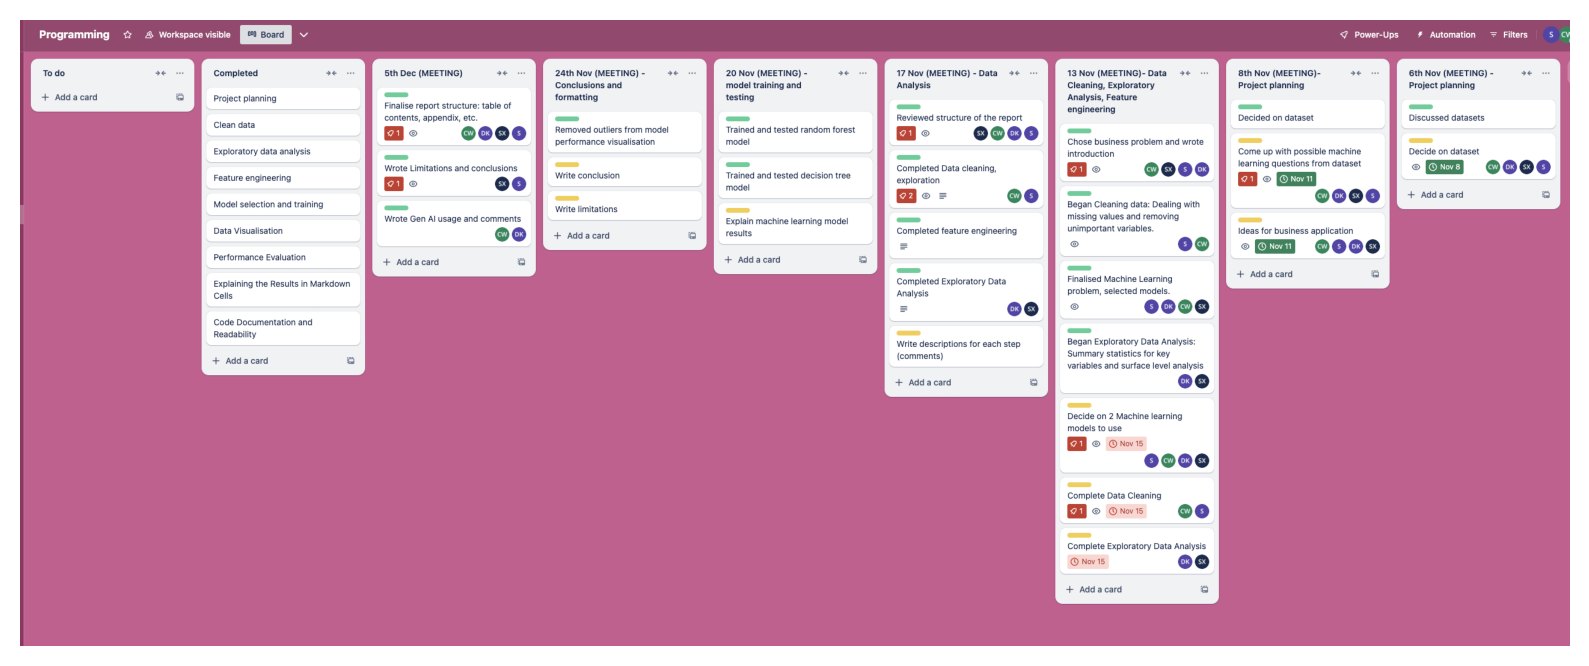

In [49]:
#This first set of images shows our Trello progress for the meetings we had and the assigned work for each group member.
#Tasks are labelled with the initials of group members who worked on them

import matplotlib.image as mpimg

#First 2 meetings
img = mpimg.imread('TRELLO 1.png')
plt.figure(figsize=(10, 10), dpi=200)
plt.axis('off')
plt.imshow(img)
plt.show();

#First 3 meetings
img = mpimg.imread('TRELLO 2.png')
plt.figure(figsize=(10, 10), dpi=200)
plt.axis('off')
plt.imshow(img)
plt.show();

#4th meeting
img = mpimg.imread('TRELLO 3.png')
plt.figure(figsize=(10, 10), dpi=200)
plt.axis('off')
plt.imshow(img)
plt.show();

#5th meeting
img = mpimg.imread('TRELLO 4.png')
plt.figure(figsize=(10, 10), dpi=200)
plt.axis('off')
plt.imshow(img)
plt.show();

#6th meeting
img = mpimg.imread('TRELLO 5.png')
plt.figure(figsize=(10, 10), dpi=200)
plt.axis('off')
plt.imshow(img)
plt.show();

#7th meeting
img = mpimg.imread('TRELLO 6.png')
plt.figure(figsize=(10, 10), dpi=200)
plt.axis('off')
plt.imshow(img)
plt.show();

#Full trello board at the end of project completion
img = mpimg.imread('TRELLO FINAL.png')
plt.figure(figsize=(10, 10), dpi=200) 
plt.axis('off')
plt.imshow(img)
plt.show();

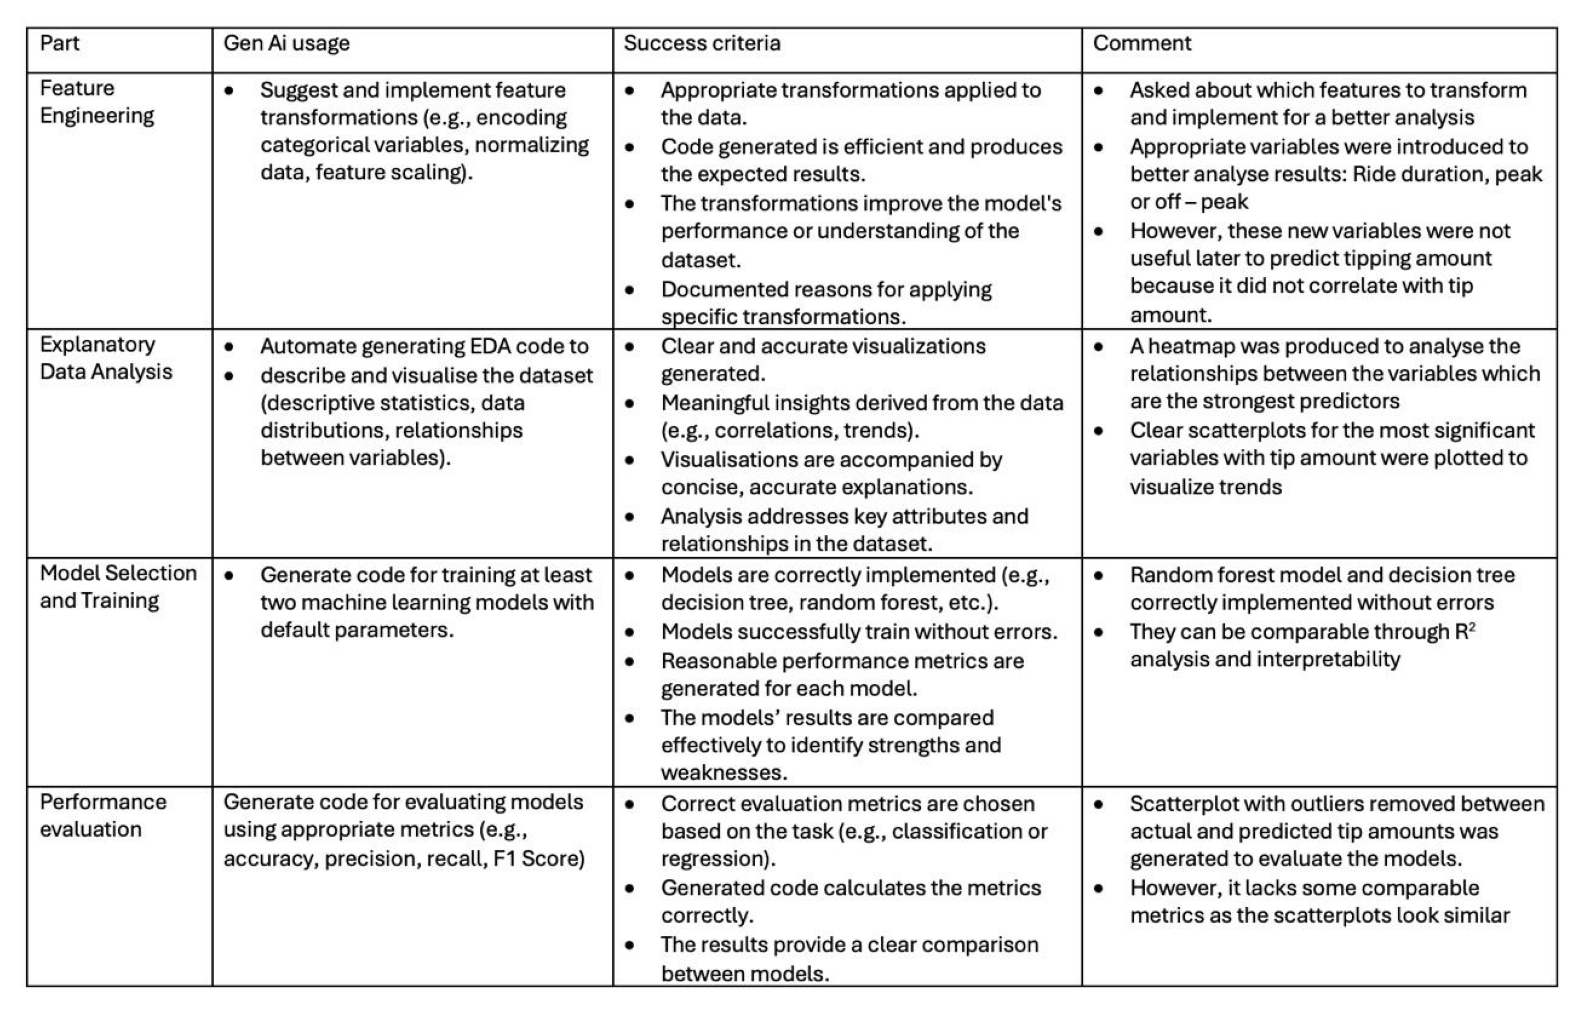

In [51]:
#The following table shows how we used AI during the course of our project
img = mpimg.imread('AI-Usage.jpeg')
plt.figure(figsize=(10, 10), dpi=200)
plt.axis('off')
plt.imshow(img)
plt.show();